In [1]:
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image
import matplotlib.pyplot as plt
from sympy import RegularPolygon, Point2D,pi,symbols,sin,sqrt
from shapely.geometry import Polygon,MultiPolygon
from shapely import affinity
from time import time
from random import choices,randint,shuffle
import numpy as np

### Puzzle as published 
https://www.janestreet.com/puzzles/pent-up-frustration-2-index/

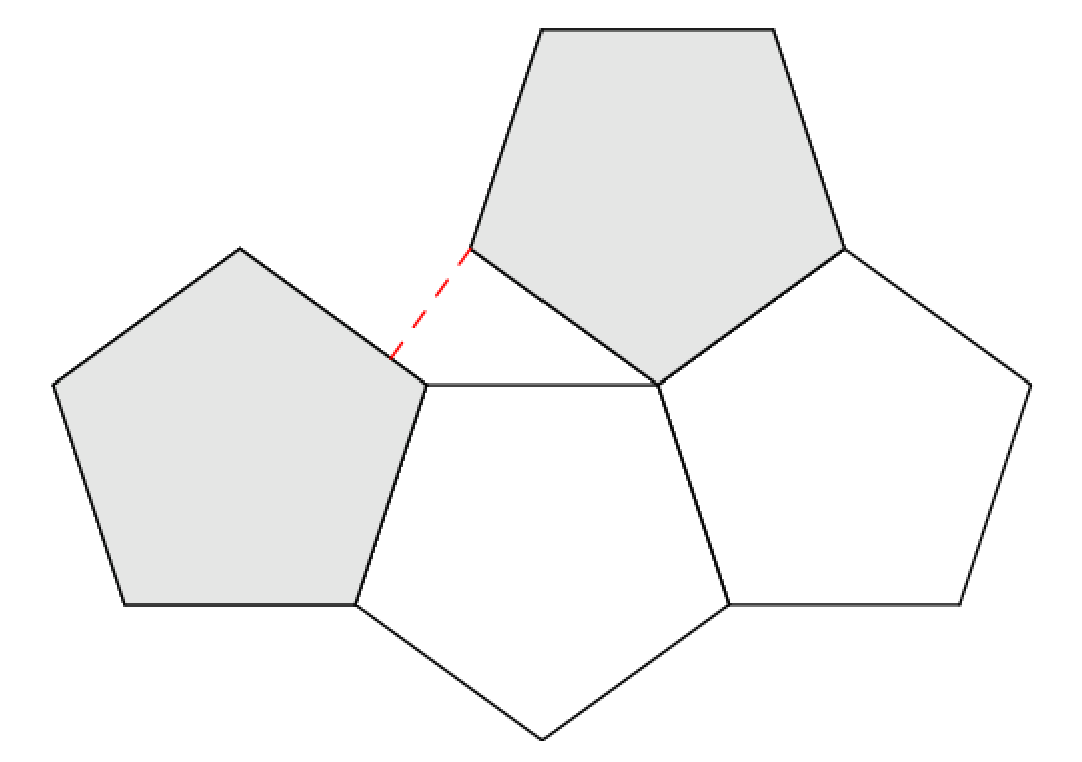

In [2]:
url='https://www.janestreet.com/puzzles/pent-up-frustration-2-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Puzzle as published \n'+url))
display(Image('https://www.janestreet.com/puzzles/pent-up-frustration-2.png',width=400))
HTML(str(soup.find_all('div', {'class' :'col-12'})[4]))

In [3]:
#some code to visualise
def plot_polys(polys):
    fig,ax= plt.subplots(1,1,figsize=(5,5))
    for poly in polys:        
        plot_coords(poly.exterior.coords)
    ax.axis("off")
        
def plot_coords(coords):
    pts = list(coords)
    x, y = zip(*pts)
    plt.plot(x,y, color='k', linewidth=1)
    plt.fill_between(x, y)
    plt.show   

In [4]:
# sympy geometry is too slow. Use the Regular Pentagon to get the vertices easily and then
# use shapely from there
n = RegularPolygon(Point2D(0,0), 1/(2*sin(pi/5)), 5,rot=pi/2)
p= Polygon([(e.x,e.y) for e in n.vertices])

def new_pent(p,i):
    verts = [*p.exterior.coords]
    centroid_x = p.centroid.x
    centroid_y =p.centroid.y
    mid_x =(verts[i][0]+verts[i+1][0])/2
    mid_y =(verts[i][1]+verts[i+1][1])/2
    trans_x = 2*(mid_x-centroid_x)
    trans_y = 2*(mid_y-centroid_y)
    return affinity.rotate(affinity.translate(p,trans_x,trans_y),180,origin='centroid')

Distance is 0.5877853


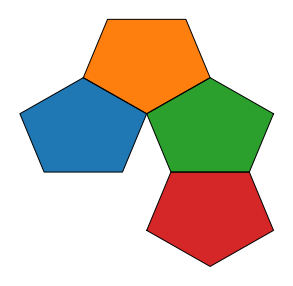

In [5]:
# check the test puzzle
pents = [p]
edges =[0, 1, 3]
for i in edges:
    pents.append(new_pent(pents[-1],i))
    
plot_polys(pents)  

print("Distance is {:.7f}".format(pents[0].distance(pents[-1])))

Distance 1.6180340 in 0.029948 secs
Distance 1.5388418 in 0.032939 secs
Distance 0.9510565 in 0.032939 secs
Distance 0.5877853 in 0.045747 secs
Distance 0.3632713 in 0.110570 secs
Distance 0.2245140 in 9.716923 secs
Distance 0.1387573 in 43.163533 secs


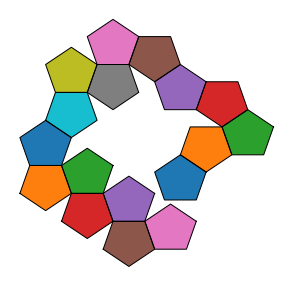

In [6]:
start= time()
N = 17
best_len = 10
trials = [[[p,new_pent(p,0),new_pent(new_pent(p,0),1)],1],[[p,new_pent(p,0),new_pent(new_pent(p,0),2)],2]]

while len(trials) >0 and time()-start <60*10:
    pents,prev=trials.pop()
    if len(pents) <= N and pents[0].distance(pents[-1]) < (N - len(pents)) * 1.4:
        choices = [i for i in range(5) if i !=prev]
        shuffle(choices)
        for i in choices:
            test_pent = new_pent(pents[-1],i)
            if np.all([p.overlaps(test_pent.buffer(-0.001))==False for p in pents[:-1]]):        
                trials.append([pents+[test_pent],i])
    else:
        dist = pents[0].distance(pents[-1])
        if dist < best_len-0.000001 and dist > 0.000000001:
            best_len = dist
            best_pent = pents        
            print("Distance {:.7f} in {:.6f} secs".format(pents[0].distance(pents[-1]),time()-start))

plot_polys(best_pent)


Distance is 0.1387573


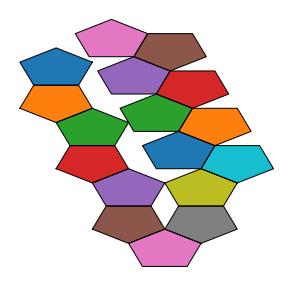

In [7]:
# published answer. Didn't spend enough time on this this month.

pents = [p]
edges =[3,1,3,1,3,1,
        0,3,
        0,4,0,4,0,4,0,4]
for i in edges:
    pents.append(new_pent(pents[-1],i))
    
plot_polys(pents)  

print("Distance is {:.7f}".format(pents[0].distance(pents[-1])))

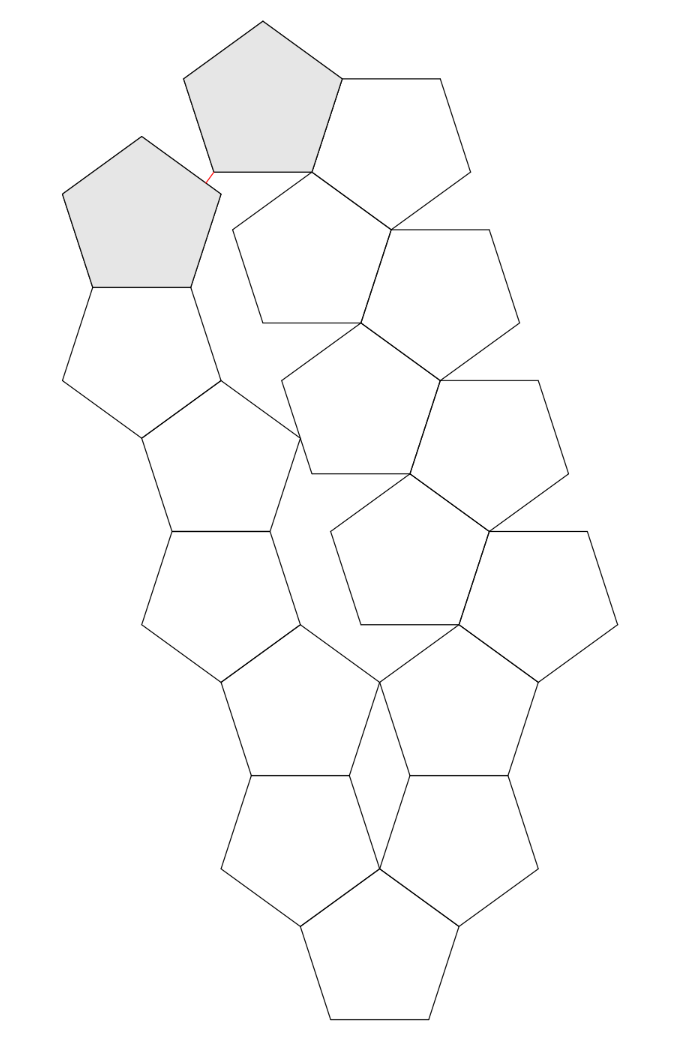

### Solution as published 
https://www.janestreet.com/puzzles/pent-up-frustration-2-solution/

In [8]:
url='https://www.janestreet.com/puzzles/pent-up-frustration-2-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')

display(Image('https://www.janestreet.com/puzzles/pent-up-frustration-2-solution.png',width=200))
display(Markdown('### Solution as published \n'+url))
HTML(str(soup.find_all('div', {'class' :'col-12'})[4]))